In [48]:
#매장명 : store_name , 주소 : store_address , 시도 : store_depth1 , 주차 : store_parking , 매장유형 : store_seats
import requests
import pandas as pd
url='https://theborndb.theborn.co.kr/wp-json/api/get_store/?state=9&category=275&depth1=&depth2=&paged=1&search_string='
r=requests.get(url)
bback=r.json()

name=[]
address=[]
depth1=[]
parking=[]
seats=[]

pgSize=bback['max_count']//10+1 # 매장 페이지 수
for i in range(1,pgSize+1):
    url='https://theborndb.theborn.co.kr/wp-json/api/get_store/?state=9&category=275&depth1=&depth2=&paged={}&search_string='
    r=requests.get(url.format(i))
    bback=r.json()
    bback2=bback['results'] # 매장상세 코드 

    for i in bback2:
        name.append(i['store_name'])
        address.append(i['store_address'])
        if i['store_depth1']=='서울특별시':
            depth1.append("서울")
        elif i['store_depth1']=='부산광역시':
            depth1.append("부산")
        elif i['store_depth1']=='대구광역시':
            depth1.append("대구")
        elif i['store_depth1']=='인천광역시':
            depth1.append("인천")
        elif i['store_depth1']=='광주광역시':
            depth1.append("광주")
        elif i['store_depth1']=='대전광역시':
            depth1.append("대전")
        elif i['store_depth1']=='울산광역시':
            depth1.append("울산")
        elif i['store_depth1']=='세종특별자치시':
            depth1.append("세종")
        elif i['store_depth1']=='경기도':
            depth1.append("경기")
        elif i['store_depth1']=='강원도':
            depth1.append("강원")
        elif i['store_depth1']=='충청북도':
            depth1.append("충북")
        elif i['store_depth1']=='충청남도':
            depth1.append("충남")
        elif i['store_depth1']=='전라북도':
            depth1.append("전북")
        elif i['store_depth1']=='전라남도':
            depth1.append("전남")
        elif i['store_depth1']=='경상북도':
            depth1.append("경북")
        elif i['store_depth1']=='경상남도':
            depth1.append("경남")
        elif i['store_depth1']=='제주도':
            depth1.append("제주")
        parking.append(i['store_parking'])
        seats.append(i['store_seats'])
        
BBACK={'매장명':name, '주소':address, '매장유형':seats,'시':depth1 }

pd.DataFrame(BBACK)

,매장명,주소,매장유형,시
0,대전신탄진동일점,대전광역시 대덕구 대청로 38,테이블 11개 / 좌석 22석,대전
1,대구불로동점,"대구광역시 동구 불로동 1190, 1층",테이블 11개 / 좌석 22석,대구
2,광주신현점,경기도 광주시 새말길 3,"테이블 8개, 좌석 16석",경기
3,청주사천점,충북 청주시 청원구 새터로 173,"테이블 16개, 좌석 34석",충북
4,강원정선점,강원 정선군 정선읍 봉양6길 25-1 (봉양리) 1층 132호,테이블 16개 / 좌석 32석,강원
...,...,...,...,...
1271,신대방삼거리점,서울특별시 동작구 국사봉1길 28,테이블 10개 / 좌석 20석,서울
1272,충남대병원점,대전광역시 중구 계룡로920번길 36,20테이블 30석,대전
1273,태평로점,"서울시 중구 세종대로 82, 1층",,서울
1274,구미상모점,"경상북도 구미시 상사서로 77, 1층",없음,경북


In [51]:
BBACK_ = pd.DataFrame(BBACK)

In [52]:
BBACK_['이름'] = '빽다방'

In [53]:
BBACK_

,매장명,주소,매장유형,시,이름
0,대전신탄진동일점,대전광역시 대덕구 대청로 38,테이블 11개 / 좌석 22석,대전,빽다방
1,대구불로동점,"대구광역시 동구 불로동 1190, 1층",테이블 11개 / 좌석 22석,대구,빽다방
2,광주신현점,경기도 광주시 새말길 3,"테이블 8개, 좌석 16석",경기,빽다방
3,청주사천점,충북 청주시 청원구 새터로 173,"테이블 16개, 좌석 34석",충북,빽다방
4,강원정선점,강원 정선군 정선읍 봉양6길 25-1 (봉양리) 1층 132호,테이블 16개 / 좌석 32석,강원,빽다방
...,...,...,...,...,...
1271,신대방삼거리점,서울특별시 동작구 국사봉1길 28,테이블 10개 / 좌석 20석,서울,빽다방
1272,충남대병원점,대전광역시 중구 계룡로920번길 36,20테이블 30석,대전,빽다방
1273,태평로점,"서울시 중구 세종대로 82, 1층",,서울,빽다방
1274,구미상모점,"경상북도 구미시 상사서로 77, 1층",없음,경북,빽다방


In [49]:
from tqdm import tqdm
import requests
from bs4 import BeautifulSoup as BS

region = ['서울','경기','인천','강원','광주','대전','대구','부산','울산','세종','경남','경상남도','경북','경상북도','전라남도','전남','전라북도','전북','충청남도','충남','충청북도','충북','제주']
url = "https://www.mega-mgccoffee.com/store/find/store_search.php?store_search="
payload = {'store_search' :''}
mega_total =[]
for i in tqdm(range(len(region))):
    payload['store_search'] = region[i]
    r = requests.get(url, params = payload)
    bs = BS(r.text)
   
    for x in range(0, len(bs.findAll("b"))):
        total = {}
        total['매장명'] = bs.findAll("b")[x].text
        total['전화번호'] = bs.findAll("div" , class_ = 'cont_text_inner cont_text_info')[x].text.split()[-1]
        total['주소'] = " ".join(bs.findAll("div" , class_ = 'cont_text_inner cont_text_info')[x].text.split()[:-1])
        mega_total.append(total)
import pandas as pd
mega = pd.DataFrame(mega_total)
mega_total = pd.DataFrame(mega.drop_duplicates(keep=False))
mega_total.loc[(mega_total['주소'].str.find("서울") == 0), '시'] = '서울'
mega_total.loc[(mega_total['주소'].str.find("경기") == 0), '시'] = '경기'
mega_total.loc[(mega_total['주소'].str.find("부산") == 0), '시'] = '부산'
mega_total.loc[(mega_total['주소'].str.find("대전") == 0), '시'] = '대전'
mega_total.loc[(mega_total['주소'].str.find("광주") == 0), '시'] = '광주'
mega_total.loc[(mega_total['주소'].str.find("대구") == 0), '시'] = '대구'
mega_total.loc[(mega_total['주소'].str.find("울산") == 0), '시'] = '울산'
mega_total.loc[(mega_total['주소'].str.find("인천") == 0), '시'] = '인천'
mega_total.loc[(mega_total['주소'].str.find("강원") == 0), '시'] = '강원'
mega_total.loc[(mega_total['주소'].str.find("세종") == 0), '시'] = '세종'
mega_total.loc[(mega_total['주소'].str.find("제주") == 0), '시'] = '제주'
mega_total.loc[(mega_total['주소'].str.find("경북") == 0) |
        (mega_total['주소'].str.find("경상북도") == 0), '시'] = '경북'
mega_total.loc[(mega_total['주소'].str.find("전북") == 0) |
        (mega_total['주소'].str.find("전라북도") == 0), '시'] = '전북'
mega_total.loc[(mega_total['주소'].str.find("전남") == 0) |
        (mega_total['주소'].str.find("전라남도") == 0), '시'] = '전남'
mega_total.loc[(mega_total['주소'].str.find("충북") == 0) |
        (mega_total['주소'].str.find("충청북도") == 0), '시'] = '충북'
mega_total.loc[(mega_total['주소'].str.find("충남") == 0) |
        (mega_total['주소'].str.find("충청남도") == 0), '시'] = '충남'
mega_total.loc[(mega_total['주소'].str.find("경남") == 0) |
        (mega_total['주소'].str.find("경상남도") == 0), '시'] = '경남'



100%|███████████████████████████████████████████| 23/23 [01:11<00:00,  3.13s/it]


In [54]:
mega_total

,매장명,전화번호,주소,시
1,북서울꿈의숲점,02-912-8982,"서울 성북구 돌곶이로 220 (장위동, 꿈의숲코오롱하늘채아파트), 상가104동 107호",서울
2,삼육서울병원점,02-2213-2322,"서울특별시 동대문구 망우로 78, 1층(휘경동)",서울
3,서울갈현초점,02-353-3321,"서울 은평구 갈현로 260 (갈현동), 1층",서울
4,서울공덕초교점,02-712-5541,"서울특별시 마포구 만리재옛길 6, 1층(신공덕동)",서울
5,서울대입구역점,02-871-9001,"서울특별시 관악구 관악로 195, 제1층 제115호(봉천동 , 관악위버폴리스)",서울
...,...,...,...,...
2331,제주함덕해수욕장점,064-782-0647,"제주특별자치도 제주시 조천읍 조함해안로 528, 1층",제주
2332,제주혁신도시점,064-738-0477,"제주특별자치도 서귀포시 대청로 34 , (강정동)1층",제주
2333,서귀포여중점,064-762-9777,제주특별자치도 서귀포시 일주동로 8840 (서홍동),제주
2334,서귀포효돈점,064-767-7778,"제주특별자치도 서귀포시 일주동로 8088 , 1층(하효동)",제주


In [55]:
mega_total['이름'] = "메가커피"

In [56]:
mega_total

,매장명,전화번호,주소,시,이름
1,북서울꿈의숲점,02-912-8982,"서울 성북구 돌곶이로 220 (장위동, 꿈의숲코오롱하늘채아파트), 상가104동 107호",서울,메가커피
2,삼육서울병원점,02-2213-2322,"서울특별시 동대문구 망우로 78, 1층(휘경동)",서울,메가커피
3,서울갈현초점,02-353-3321,"서울 은평구 갈현로 260 (갈현동), 1층",서울,메가커피
4,서울공덕초교점,02-712-5541,"서울특별시 마포구 만리재옛길 6, 1층(신공덕동)",서울,메가커피
5,서울대입구역점,02-871-9001,"서울특별시 관악구 관악로 195, 제1층 제115호(봉천동 , 관악위버폴리스)",서울,메가커피
...,...,...,...,...,...
2331,제주함덕해수욕장점,064-782-0647,"제주특별자치도 제주시 조천읍 조함해안로 528, 1층",제주,메가커피
2332,제주혁신도시점,064-738-0477,"제주특별자치도 서귀포시 대청로 34 , (강정동)1층",제주,메가커피
2333,서귀포여중점,064-762-9777,제주특별자치도 서귀포시 일주동로 8840 (서홍동),제주,메가커피
2334,서귀포효돈점,064-767-7778,"제주특별자치도 서귀포시 일주동로 8088 , 1층(하효동)",제주,메가커피


In [50]:
from tqdm import tqdm
from bs4 import BeautifulSoup as BS
import requests
venti={}
for x in tqdm(range(1,104)):            
    url = 'https://www.theventi.co.kr/new2022/store/index.html?page={}&plist=&find_field=&find_word=&find_state=&find_ordby=&conf=&find_mode=&city=&county='.format(x)
    r = requests.get(url)
    r.encoding = 'utf-8'
    bs = BS(r.text)
    store = bs.findAll("p", class_ = "tit_b _mc")
    address = bs.findAll("div", class_ = "address")
    for y in range(len(store)):
        venti[store[y].text] = address[y].text   
venti_total=pd.DataFrame(venti.items(),columns=['매장명', '주소'])

venti_total

100%|█████████████████████████████████████████| 103/103 [00:30<00:00,  3.41it/s]


,매장명,주소
0,군산신역세권점,전북 군산시 내흥동 1017 상가 9호
1,광주하남2지구점,광주 광산구 하남대로54번안길 104-3 (하남동) 1층
2,용인청현마을점,경기 용인시 기흥구 덕영대로2077번길 4 (영덕동)
3,가재울점,"서울 서대문구 수색로 100 (북가좌동, DMC 래미안 e편한세상) 2단지 상가4..."
4,부평SK뷰해모로점,"인천 부평구 동수천로 71 (부평동, 부평 SK VIEW 해모로 아파트) 1층 104호"
...,...,...
1016,주례점,"부산 사상구 가야대로366번길 46 (주례동), 1층"
1017,중앙점,부산 중구 해관로 61-2 (중앙동4가)
1018,대연못골점,"부산 남구 수영로 264 (대연동, 금화당)"
1019,동아대점,부산 사하구 하단동 494-3 에덴아파트 상가제 1층 제 10호


In [61]:
venti_total.loc[(venti_total['주소'].str.find("서울")==0),'시'] = '서울'
venti_total.loc[(venti_total['주소'].str.find("부산")==0),'시'] = '부산'
venti_total.loc[(venti_total['주소'].str.find("인천")==0),'시'] = '인천'
venti_total.loc[(venti_total['주소'].str.find("광주")==0),'시'] = '광주'
venti_total.loc[(venti_total['주소'].str.find("대전")==0),'시'] = '대전'
venti_total.loc[(venti_total['주소'].str.find("울산")==0),'시'] = '울산'
venti_total.loc[(venti_total['주소'].str.find("세종")==0),'시'] = '세종'
venti_total.loc[(venti_total['주소'].str.find("경기")==0),'시'] = '경기'
venti_total.loc[(venti_total['주소'].str.find("강원")==0),'시'] = '강원'
venti_total.loc[(venti_total['주소'].str.find("충북")==0),'시'] = '충북'
venti_total.loc[(venti_total['주소'].str.find("충남")==0),'시'] = '충남'
venti_total.loc[(venti_total['주소'].str.find("전북")==0),'시'] = '전북'
venti_total.loc[(venti_total['주소'].str.find("전남")==0),'시'] = '전남'
venti_total.loc[(venti_total['주소'].str.find("경북")==0),'시'] = '경북'
venti_total.loc[(venti_total['주소'].str.find("경남")==0),'시'] = '경남'
venti_total.loc[(venti_total['주소'].str.find("경상남도")==0),'시'] = '경남'
venti_total.loc[(venti_total['주소'].str.find("경상북도")==0),'시'] = '경북'
venti_total.loc[(venti_total['주소'].str.find("제주")==0),'시'] = '제주'
venti_total.loc[(venti_total['주소'].str.find("대구")==0),'시'] = '대구'
venti_total.loc[(venti_total['매장명'].str.find("용인흥덕점")==0),'시'] = '경기'
venti_total.loc[(venti_total['매장명'].str.find("인천성모병원점")==0),'시'] = '인천'
venti_total.loc[(venti_total['매장명'].str.find("대구용계점")==0),'시'] = '대구'
venti_total.loc[(venti_total['매장명'].str.find("창원어반브릭스점")==0),'시'] = '경남'

venti_total= venti_total[['매장명', '주소','시']]

In [62]:
venti_total

,매장명,주소,시
0,군산신역세권점,전북 군산시 내흥동 1017 상가 9호,전북
1,광주하남2지구점,광주 광산구 하남대로54번안길 104-3 (하남동) 1층,광주
2,용인청현마을점,경기 용인시 기흥구 덕영대로2077번길 4 (영덕동),경기
3,가재울점,"서울 서대문구 수색로 100 (북가좌동, DMC 래미안 e편한세상) 2단지 상가4...",서울
4,부평SK뷰해모로점,"인천 부평구 동수천로 71 (부평동, 부평 SK VIEW 해모로 아파트) 1층 104호",인천
...,...,...,...
1016,주례점,"부산 사상구 가야대로366번길 46 (주례동), 1층",부산
1017,중앙점,부산 중구 해관로 61-2 (중앙동4가),부산
1018,대연못골점,"부산 남구 수영로 264 (대연동, 금화당)",부산
1019,동아대점,부산 사하구 하단동 494-3 에덴아파트 상가제 1층 제 10호,부산


In [63]:
venti_total['이름'] = "벤티"

In [64]:
venti_total

,매장명,주소,시,이름
0,군산신역세권점,전북 군산시 내흥동 1017 상가 9호,전북,벤티
1,광주하남2지구점,광주 광산구 하남대로54번안길 104-3 (하남동) 1층,광주,벤티
2,용인청현마을점,경기 용인시 기흥구 덕영대로2077번길 4 (영덕동),경기,벤티
3,가재울점,"서울 서대문구 수색로 100 (북가좌동, DMC 래미안 e편한세상) 2단지 상가4...",서울,벤티
4,부평SK뷰해모로점,"인천 부평구 동수천로 71 (부평동, 부평 SK VIEW 해모로 아파트) 1층 104호",인천,벤티
...,...,...,...,...
1016,주례점,"부산 사상구 가야대로366번길 46 (주례동), 1층",부산,벤티
1017,중앙점,부산 중구 해관로 61-2 (중앙동4가),부산,벤티
1018,대연못골점,"부산 남구 수영로 264 (대연동, 금화당)",부산,벤티
1019,동아대점,부산 사하구 하단동 494-3 에덴아파트 상가제 1층 제 10호,부산,벤티


In [65]:
BBACK_.columns

Index(['매장명', '주소', '매장유형', '시', '이름'], dtype='object')

In [66]:
mega_total.columns

Index(['매장명', '전화번호', '주소', '시', '이름'], dtype='object')

In [67]:
venti_total.columns

Index(['매장명', '주소', '시', '이름'], dtype='object')

In [69]:
BBACK_ = BBACK_[['이름','시','매장명','주소']]

In [70]:
BBACK_

,이름,시,매장명,주소
0,빽다방,대전,대전신탄진동일점,대전광역시 대덕구 대청로 38
1,빽다방,대구,대구불로동점,"대구광역시 동구 불로동 1190, 1층"
2,빽다방,경기,광주신현점,경기도 광주시 새말길 3
3,빽다방,충북,청주사천점,충북 청주시 청원구 새터로 173
4,빽다방,강원,강원정선점,강원 정선군 정선읍 봉양6길 25-1 (봉양리) 1층 132호
...,...,...,...,...
1271,빽다방,서울,신대방삼거리점,서울특별시 동작구 국사봉1길 28
1272,빽다방,대전,충남대병원점,대전광역시 중구 계룡로920번길 36
1273,빽다방,서울,태평로점,"서울시 중구 세종대로 82, 1층"
1274,빽다방,경북,구미상모점,"경상북도 구미시 상사서로 77, 1층"


In [90]:
BBACK_.시.value_counts()

경기    337
서울    262
인천    109
대전     81
충남     73
대구     58
전북     56
전남     49
경북     37
충북     37
경남     37
강원     34
제주     32
부산     24
광주     22
세종     17
울산     11
Name: 시, dtype: int64

In [71]:
BBACK_ = BBACK_[['이름','시','매장명','주소']]
mega_total = mega_total[['이름','시','매장명','주소']]
venti_total = venti_total[['이름','시','매장명','주소']]

In [72]:
BBACK_.head(1)

,이름,시,매장명,주소
0,빽다방,대전,대전신탄진동일점,대전광역시 대덕구 대청로 38


In [73]:
mega_total.head(1)

,이름,시,매장명,주소
1,메가커피,서울,북서울꿈의숲점,"서울 성북구 돌곶이로 220 (장위동, 꿈의숲코오롱하늘채아파트), 상가104동 107호"


In [74]:
venti_total.head(1)

,이름,시,매장명,주소
0,벤티,전북,군산신역세권점,전북 군산시 내흥동 1017 상가 9호


In [75]:
cafe = pd.concat([BBACK_,mega_total,venti_total],axis=0)

In [79]:
cafe.groupby(['이름','시','매장명']).sum()

주소
이름   시  매장명                                                   
메가커피 강원 강릉강일점                             강원 강릉시 율곡로 2939 (교동)
        강릉교동솔올점                       강원 강릉시 솔올로 63 (교동), 103호
        강릉교동택지점                    강원도 강릉시 솔올로5번길 55 , 1층 (교동)
        강릉내곡점                       강원도 강릉시 범일로 628-1, 1층(내곡동)
        강릉노암점      강원 강릉시 남부로125번길 5 (노암동, 노암3차한라아파트 상가), 101호
...                                                        ...
빽다방  충북 충북옥천점                            충청북도 옥천군 옥천읍 중앙로 45-1
        충북증평점      충청북도 증평군 증평읍 중동리 16-3 (도로명: 충북 증평군 중앙로 197)
        충북진천점                        충청북도 진천군 진천읍 상산로 73 (읍내리)
        충북혁신도시진천점                          충청북도 진천군 덕산읍 시가로 14
        충주신연수리첼점                             충청북도 충주시 번영대로 216

[4503 rows x 1 columns]

In [111]:
a = pd.DataFrame(cafe.시.value_counts())
a

,시
경기,1302
서울,916
인천,428
경남,195
부산,188
광주,178
전남,172
경북,155
전북,147
충남,147


<AxesSubplot:ylabel='시'>

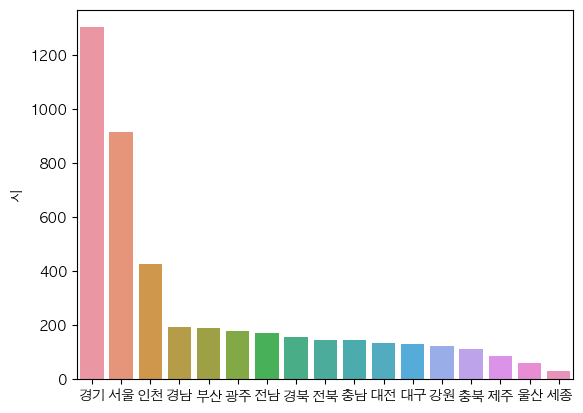

In [112]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns
plt.rcParams['font.family'] = 'AppleGothic'

import seaborn as sns
sns.barplot( x=a.index, y= '시' ,  data= a )


In [102]:
A = pd.DataFrame(BBACK_.시.value_counts())

<AxesSubplot:ylabel='시'>

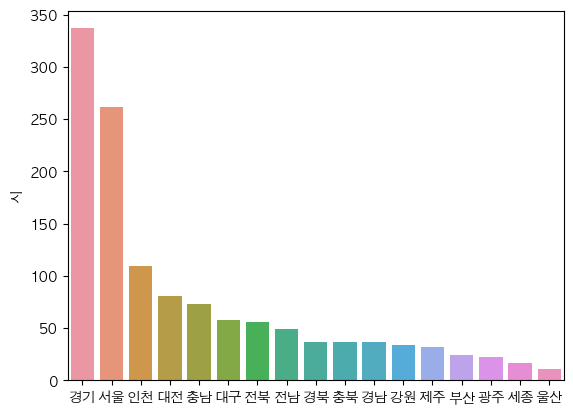

In [116]:
sns.barplot( x=A.index, y= '시' ,  data= A)

In [103]:
B = pd.DataFrame(mega_total.시.value_counts())

<AxesSubplot:ylabel='시'>

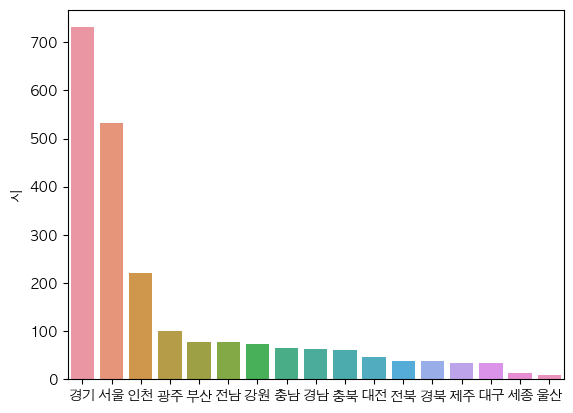

In [117]:
sns.barplot( x=B.index, y= '시' ,  data= B)

In [104]:
C = pd.DataFrame(venti_total.시.value_counts())


<AxesSubplot:ylabel='시'>

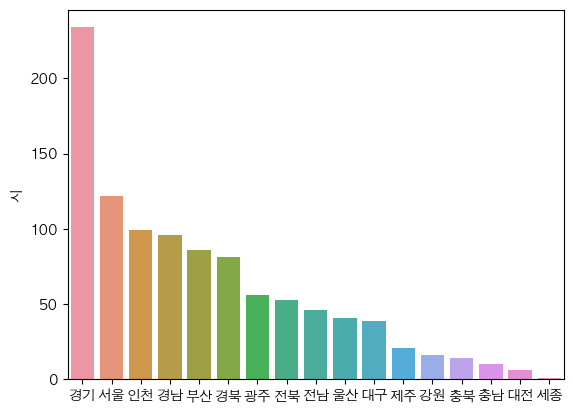

In [118]:
sns.barplot( x=C.index, y= '시' ,  data= C)